In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

general_path = "../backend/data"
print(list(os.listdir(f"{general_path}/genres_original/")))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [34]:
# Importing 1 file
y, sr = librosa.load(f"{general_path}/genres_original/rock/rock.00036.wav")

print("y:", y, "\n")
print("y shape:", np.shape(y), "\n")
print("Sample Rate (KHz):", sr, "\n")

# Verify length of the audio
print("Check Len of Audio:", 661794 / 22050)

y: [0.3204956  0.22769165 0.26626587 ... 0.21588135 0.20315552 0.35205078] 

y shape: (667920,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


In [4]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print("Audio File:", audio_file, "\n")
print("Audio File shape:", np.shape(audio_file))

Audio File: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

Audio File shape: (661794,)


Text(0.5, 1.0, 'Sound Waves in Reggae 36')

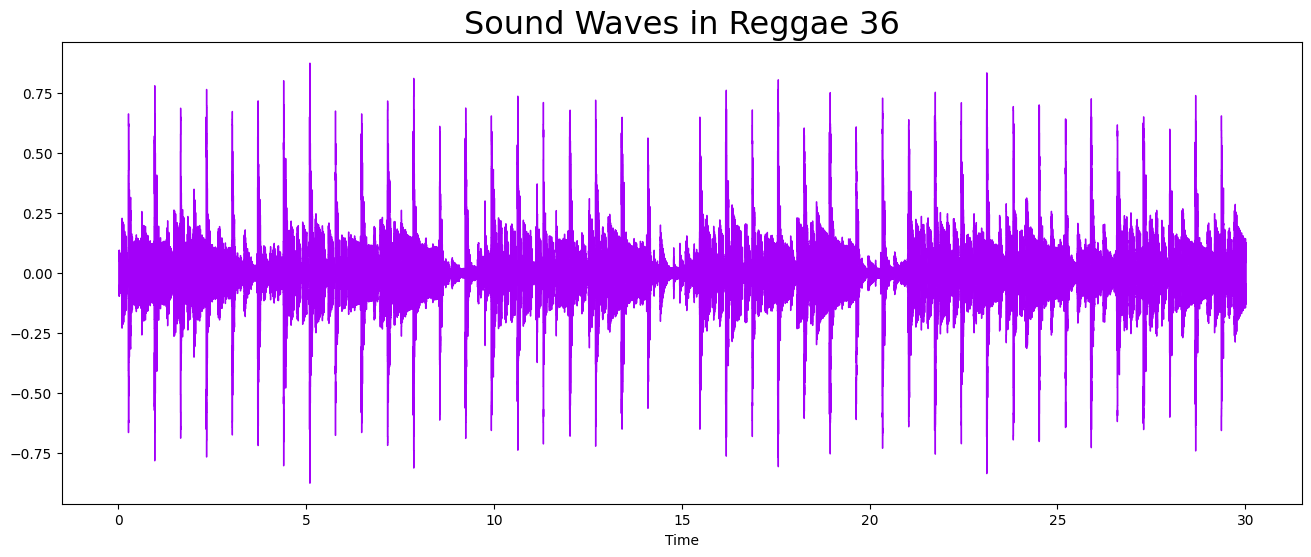

In [5]:
plt.figure(figsize=(16, 6))
librosa.display.waveshow(y=audio_file, sr=sr, color="#A300F9")
plt.title("Sound Waves in Reggae 36", fontsize=23)

In [6]:
# Default FFT window size
n_fft = 2048  # FFT window size
hop_length = (
    512  # number audio of frames between STFT columns (looks like a good default)
)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft=n_fft, hop_length=hop_length))

print("Shape of D object:", np.shape(D))

Shape of D object: (1025, 1293)


 ...]

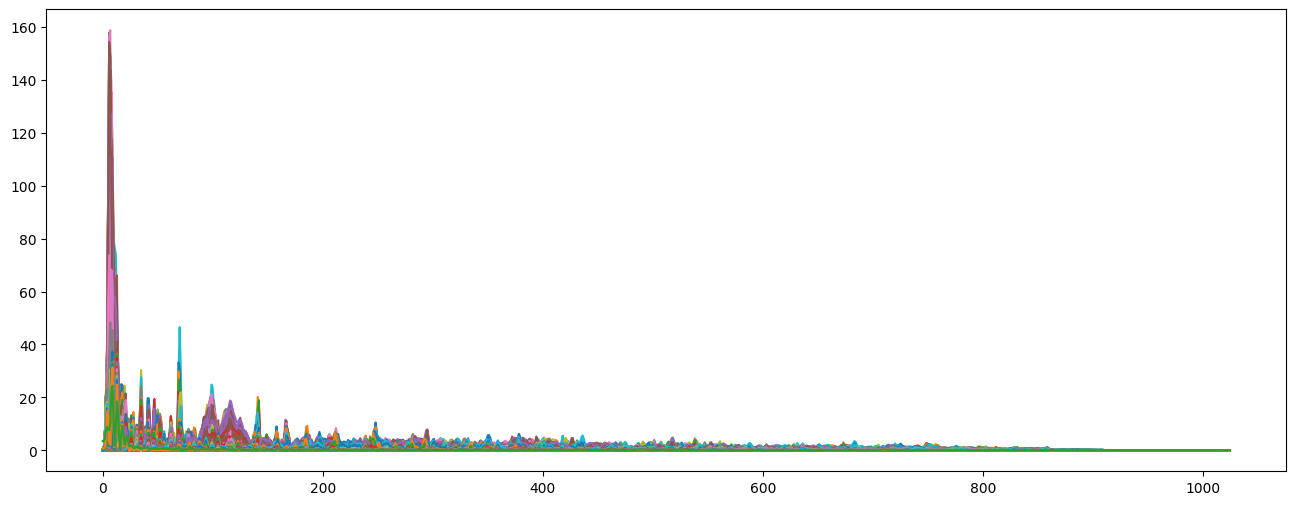

In [7]:
plt.figure(figsize=(16, 6))
plt.plot(D)

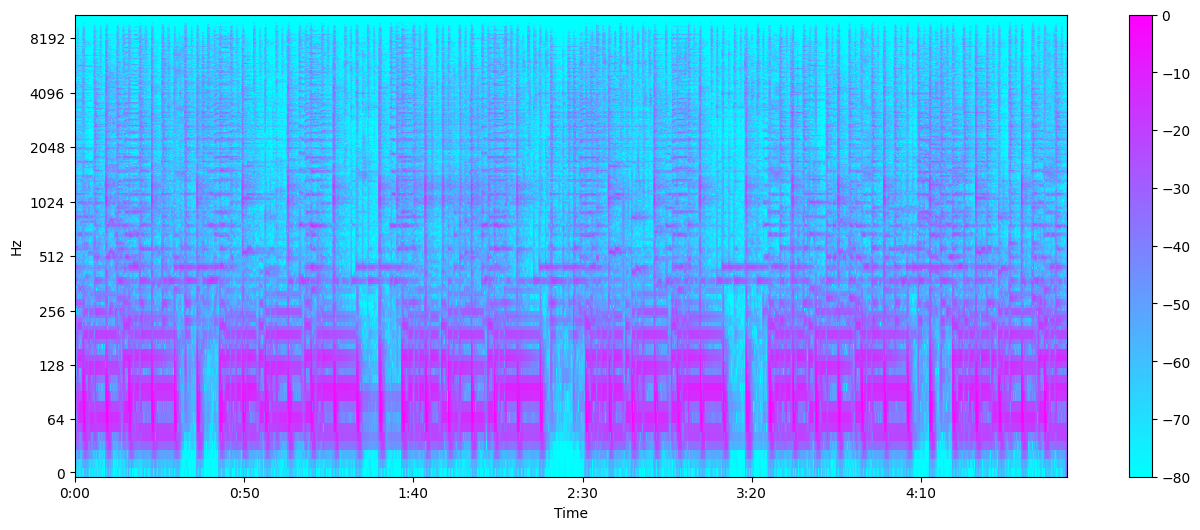

In [36]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref=np.max)

# Creating the Spectogram
plt.figure(figsize=(16, 6))
librosa.display.specshow(
    DB, sr=sr, hop_length=hop_length, x_axis="time", y_axis="log", cmap="cool"
)
plt.colorbar()

Text(0.5, 1.0, 'Metal Mel Spectrogram')

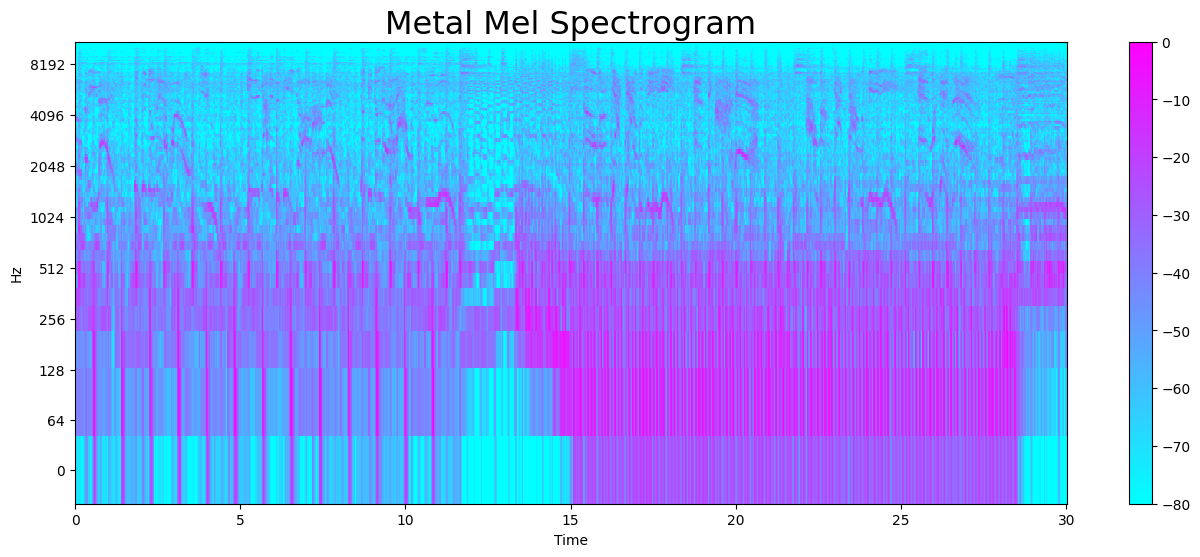

In [14]:
y, sr = librosa.load(f"{general_path}/genres_original/metal/metal.00036.wav")
y, _ = librosa.effects.trim(y)

S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize=(16, 6))
librosa.display.specshow(
    S_DB, sr=sr, hop_length=hop_length, x_axis="time", y_axis="log", cmap="cool"
)
plt.colorbar()
plt.title("Metal Mel Spectrogram", fontsize=23)

Text(0.5, 1.0, 'Classical Mel Spectrogram')

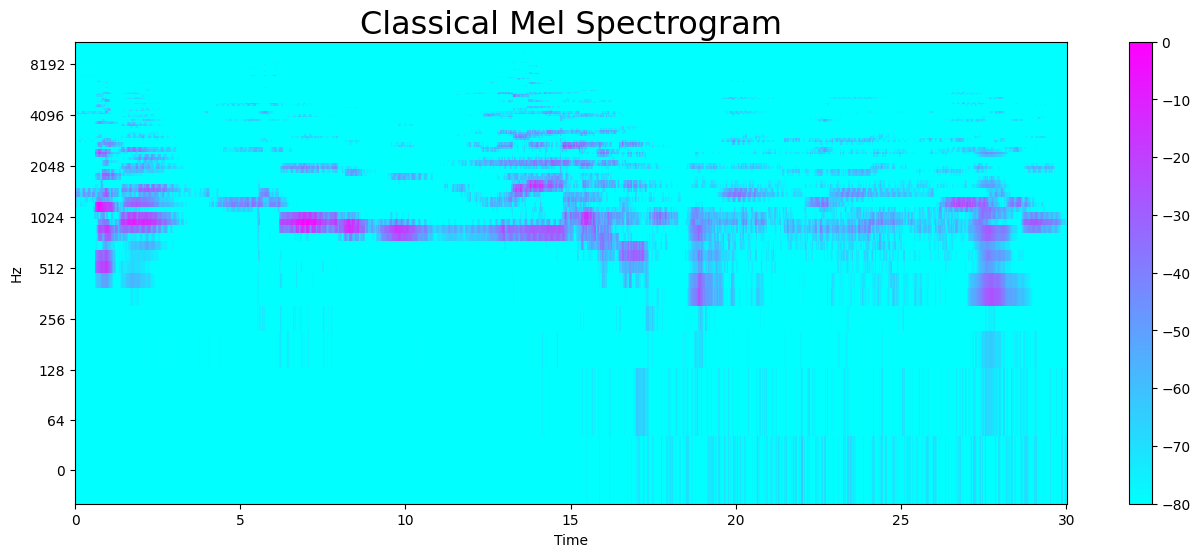

In [16]:
y, sr = librosa.load(f"{general_path}/genres_original/classical/classical.00036.wav")
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize=(16, 6))
librosa.display.specshow(
    S_DB, sr=sr, hop_length=hop_length, x_axis="time", y_axis="log", cmap="cool"
)
plt.colorbar()
plt.title("Classical Mel Spectrogram", fontsize=23)

In [17]:
# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings))

39232


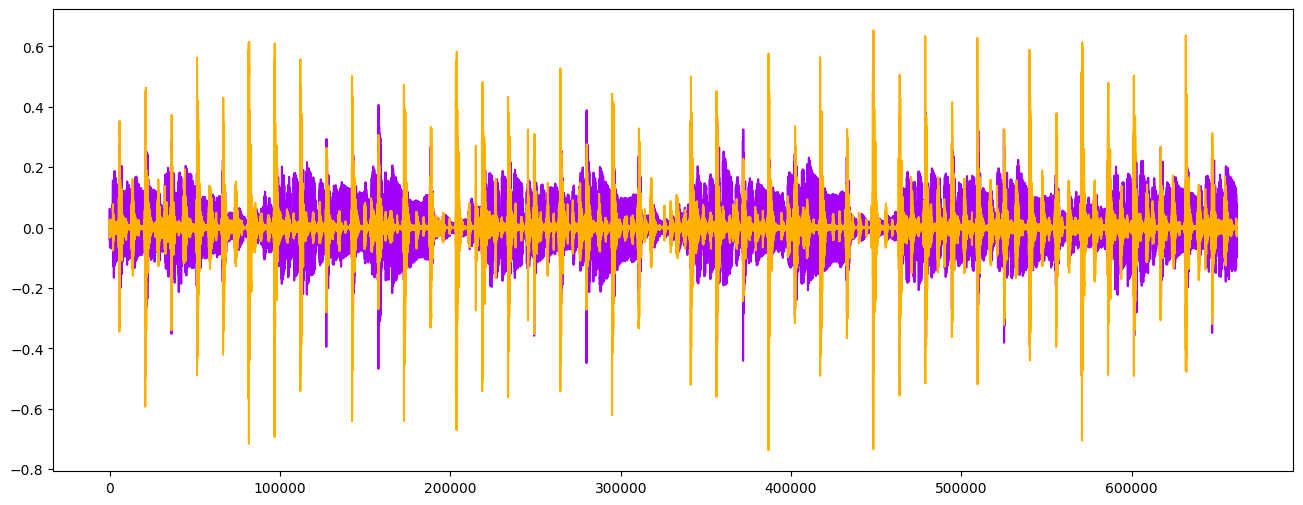

In [18]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize=(16, 6))
plt.plot(y_harm, color="#A300F9")
plt.plot(y_perc, color="#FFB100")

In [20]:
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
tempo

array([107.66601562])

In [22]:
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(y=audio_file, sr=sr)[0]

# Shape is a vector
print("Centroids:", spectral_centroids, "\n")
print("Shape of Spectral Centroids:", spectral_centroids.shape, "\n")

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print("frames:", frames, "\n")
print("t:", t)


# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Centroids: [1758.29476821 1946.74243805 2038.81133429 ...  766.50415702 1041.07728753
 1391.05146262] 

Shape of Spectral Centroids: (1293,) 

frames: range(0, 1293) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


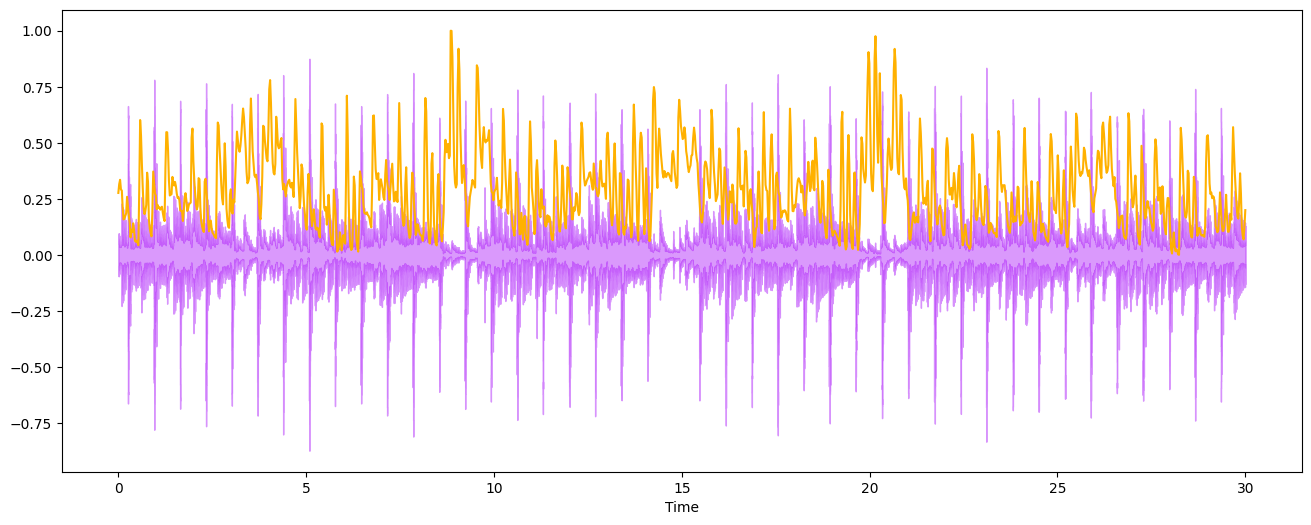

In [27]:
# Plotting the Spectral Centroid along the waveform
plt.figure(figsize=(16, 6))
librosa.display.waveshow(y=audio_file, sr=sr, alpha=0.4, color="#A300F9")
plt.plot(t, normalize(spectral_centroids), color="#FFB100")

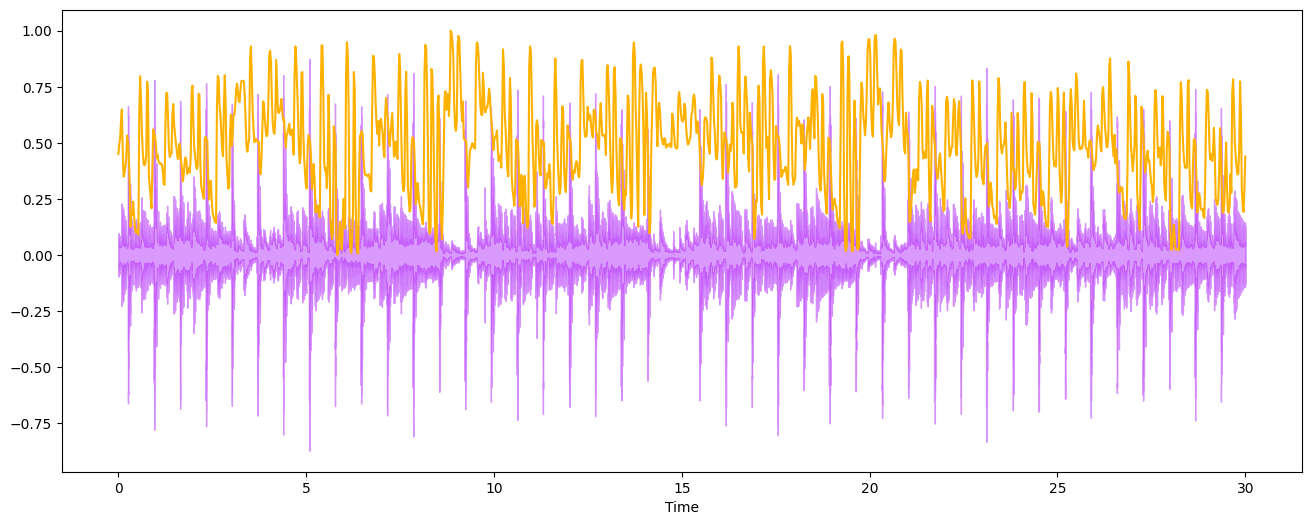

In [29]:
# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(y=audio_file, sr=sr)[0]

# The plot
plt.figure(figsize=(16, 6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color="#A300F9")
plt.plot(t, normalize(spectral_rolloff), color="#FFB100")

mfccs shape: (20, 1293)


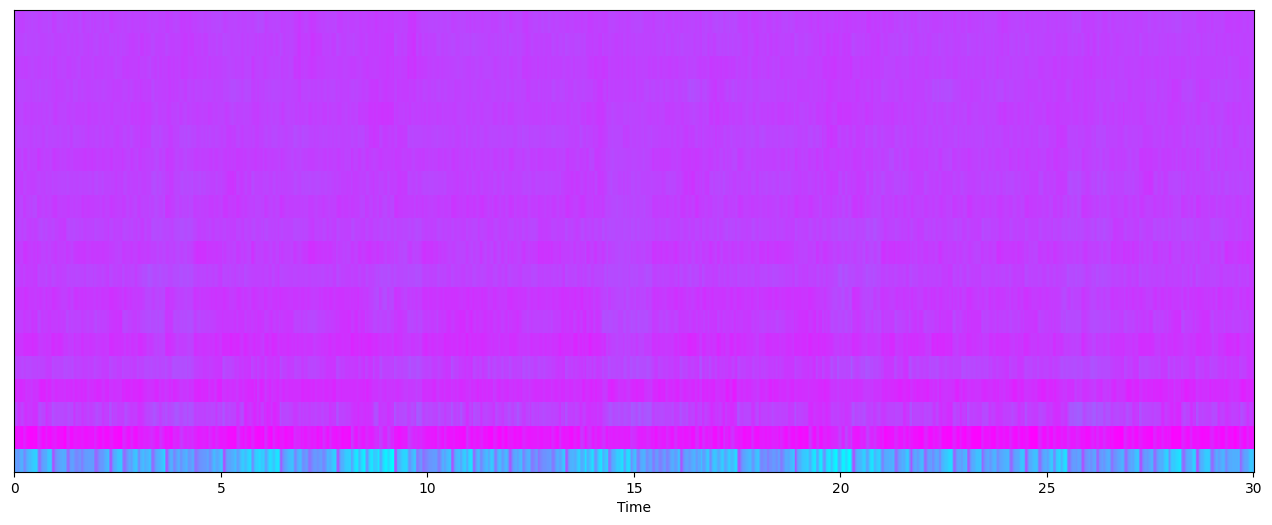

In [30]:
mfccs = librosa.feature.mfcc(y=audio_file, sr=sr)
print("mfccs shape:", mfccs.shape)

# Displaying  the MFCCs:
plt.figure(figsize=(16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis="time", cmap="cool")

Mean: 1.4751342e-09 

Var: 1.0000001


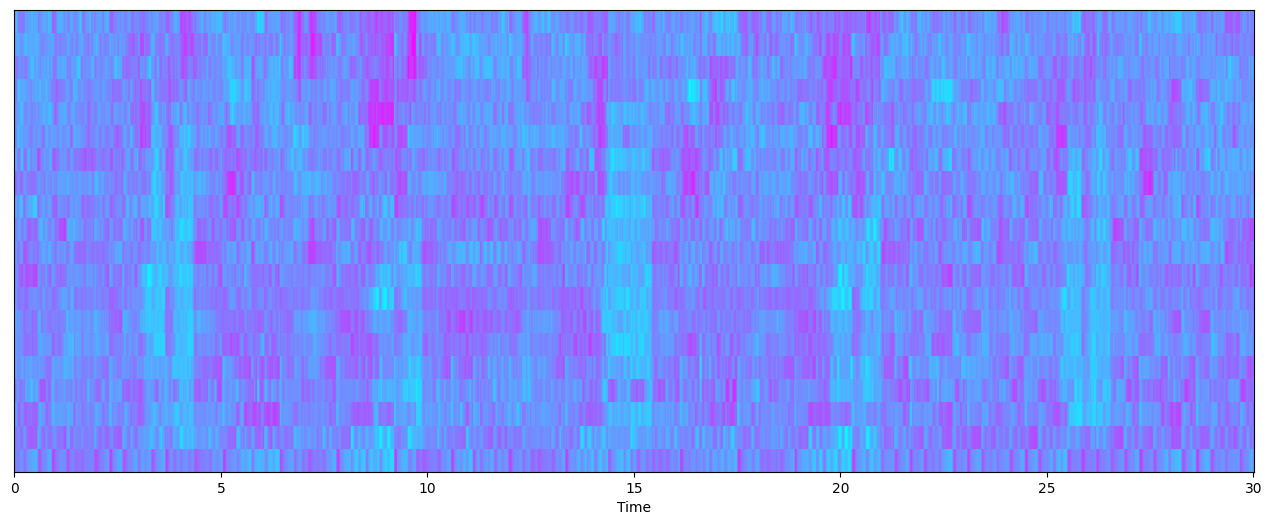

In [31]:
# Perform Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print("Mean:", mfccs.mean(), "\n")
print("Var:", mfccs.var())

plt.figure(figsize=(16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis="time", cmap="cool")

Chromogram shape: (12, 133)


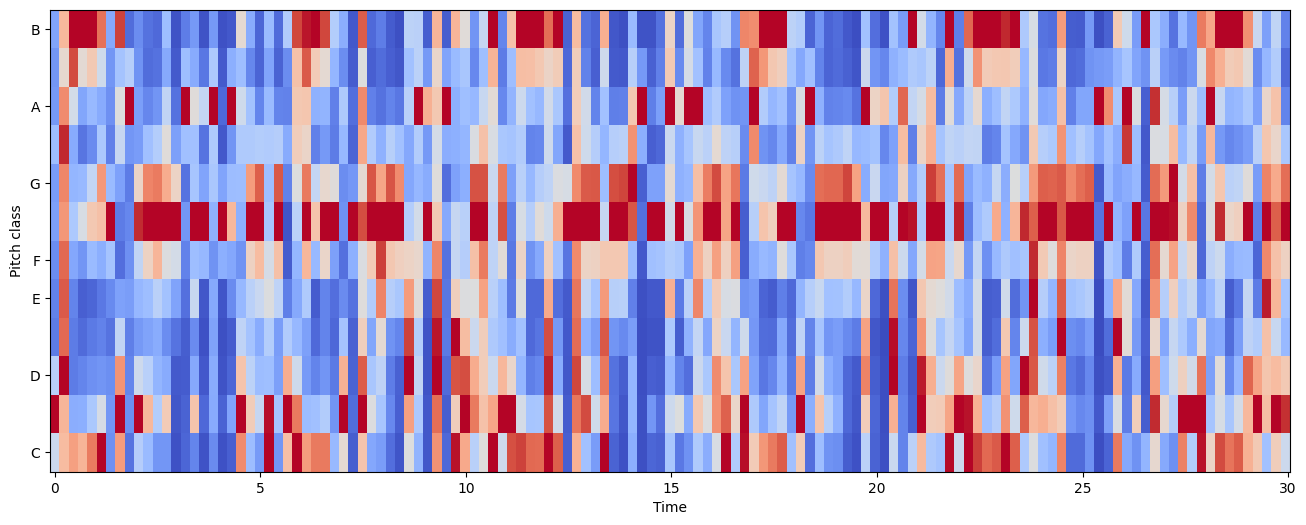

In [33]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000

# Chromogram
chromagram = librosa.feature.chroma_stft(y=audio_file, sr=sr, hop_length=hop_length)
print("Chromogram shape:", chromagram.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(
    chromagram, x_axis="time", y_axis="chroma", hop_length=hop_length, cmap="coolwarm"
)